In [53]:
import pandas as pd

### Load Dataset

In [54]:
train = pd.read_csv("Downloads/02-bike/train.csv")

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [55]:
test = pd.read_csv("Downloads/02-bike/test.csv")

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


### Preprocessing

In [56]:
train["datetime"] = pd.to_datetime(train["datetime"])

train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

print(train.shape)
train[["datetime-year","datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(10886, 18)


,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011,1,1,0,0,0
1,2011,1,1,1,0,0
2,2011,1,1,2,0,0
3,2011,1,1,3,0,0
4,2011,1,1,4,0,0


In [57]:
test["datetime"] = pd.to_datetime(test["datetime"])

test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second

print(test.shape)
test[["datetime-year","datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(6493, 15)


,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011,1,20,0,0,0
1,2011,1,20,1,0,0
2,2011,1,20,2,0,0
3,2011,1,20,3,0,0
4,2011,1,20,4,0,0


### Explore

In [58]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

### Datetime

-- 시각화 이전

1. datetime-minute과 datetime-second 컬럼은 자전거 대여량을 판가름하는 데 별 영향이 없을 것 같습니다. 따라서 countplot으로 시각화를 해보면, 마치 Uniform Distribution과 같은 모양이 나올 것입니다.

2. datetime-day의 경우, 2월은 28일까지만 존재하므로 29, 30, 31일은 다른 날짜보다 데이터가 적을 수도 있습니다. 또한 31일의 경우 다른 날에 비해 데이터가 절반밖에 되지 않을 것입니다. 그러나 데이터 갯수보다는 날짜별 자전거의 평균 대여량이 중요하기 때문에, 실제 분석에는 큰 영향을 미치지 않을 것으로 예상합니다.

3. 이런 사항 외에도, 사람의 행동 패턴 상으로 날짜나 시간이라는 개념이 자전거를 대여하는 데 중요한 영향을 미칠 것 같습니다. 1) 시간을 기준으로 새벽보다는 오후에 사람들이 자전거를 많이 빌릴 것이며, 2) 월을 기준으로 추운 겨울보다는 따뜻한 봄, 가을, 또는 더운 여름에 자전거 대여량이 많을 것 같습니다.

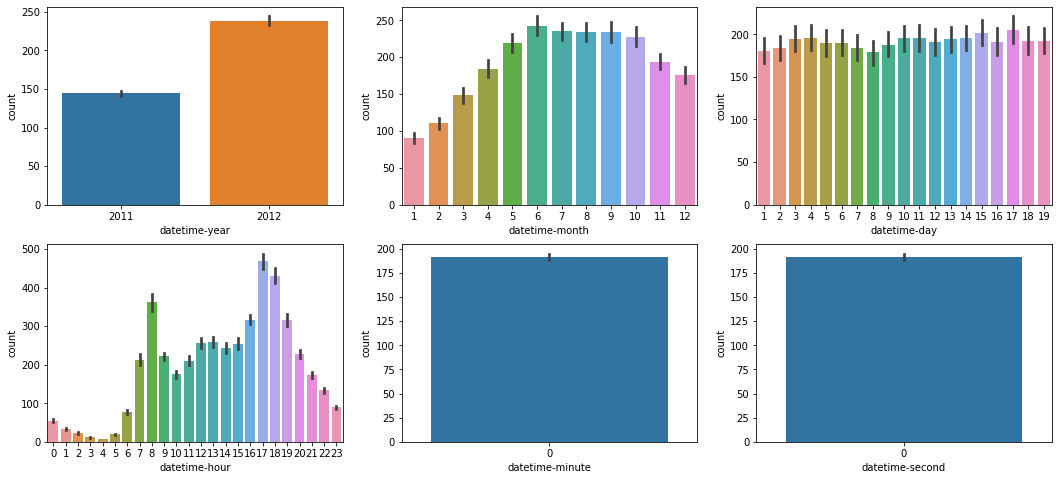

In [59]:
figure, ((ax1,ax2,ax3), (ax4, ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

-- 시각화 이후

1. datetime-year: 2011년에비해 2012년에 대여량이 약 1.5배 증가한 것으로 보아, 해당 자전거 대여 비지니스가 꾸준히 성장하고 있음을 알 수 있습니다.

2. datetime-month : 예상과 달리, 봄/가을 보다는 여름(6-8월)에 평균 대여량이 많습니다. 겨울(12-2월)의 대여량이 가장 적지만, 12월의 대여량이 1월에 비해 약 2배 가까이 높습니다.

3. datetime-day : train 데이터에는 1-19일까지의 데이터만 존재한다는 것을 알 수 있으며, 일별 평균 대여량은 대체로 200 전후로 비슷한 수준을 유지하고 있습니다.

4. datetime-hour : 낮-오후 시간대보다 출퇴근 시간의 평균 대여량이 훨신 높게 나타나고 있습니다. 밤-새벽 시간대에 자전거를 빌리는 사람은 거의 없습니다.

5. datetime-minute/second : 두 컬럼은 모두 x축이 0으로 되어 있습니다. 즉, datetime-minute과  datetime-second가 기록되지 않고 있음을 알 수 있습니다.

-- 예측모델 개선방안

1. datetime-minute과 datetime-second는 기록되지 않기 때문에, 차후 머신러닝 알고리즘에 적용할 때 feature에서 제거해도 될 것 같습니다.
2. train데이터와 test데이터를 나누는 기준이 바로 datetime-day 컬럼입니다. 이런 경우 datetime-day를 feature로 집어넣으면 머신러닝 알고리즘이 과적합(overfitting)되는 현상이 일어날 수 있습니다. 그러므로 train 데이터와 test 데이터를 나누는 기준이 되는 컬럼이 있으면, 이 컬럼은 feature로 사용하지 않는 것이 좋을 것 같습니다.
3. datetime-hour 컬럼을 보면 출퇴근 시간에 사람들이 자전거를 많이 빌린다는 사실을 알 수 있습니다. 만일 머신러닝 알고리즘이 출퇴근시간이라는 개념을 이해하지 못한다고 하면 이를 별도의 feature로 넣어주면 성능 향상을 꾀할 수 있을 듯 합니다. 그러나 workingday라는 컬럼이 이 역할을 대신하고 있을 것입니다.

-- 사용할 feature

1. datetime-year
2. datetime-month
3. datetime-hour : 시간대를 나눌 것인지 고민

### Weather

* 1: 아주 깨끗한 날시입니다. 또는 아주 약간의 구름이 끼어있습니다.
* 2: 약간의 안개와 구름이 끼어있는 날씨입니다.
* 3: 약간의 눈, 비가 오거나 천둥이 칩니다.
* 4: 아주 많은 비가 오거나 우박이 내립니다.

-- 시각화 이전

1. 날씨가 안 좋을수록 (1 -> 4) 자전거 대여량이 낮아질 것 같습니다. 
2. 값이 숫자(1,2,3,4)로 되어 있지만, 실제로는 범주형 데이터로 처리해야 할 것입니다.
3. 아주 심하진 않겠지만, 날씨마다의 편차가 있을 것입니다. 가령 어떤 날은 날씨가 좋아도 안 빌리고, 어떤 날은 날씨가 안 좋아도 많이 빌릴 수도 있습니다.

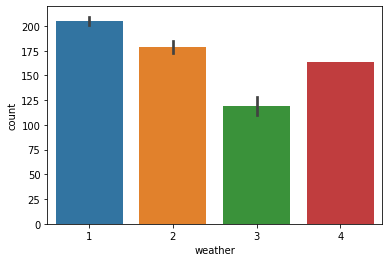

In [60]:
sns.barplot(data=train, x="weather", y="count")

In [61]:
print(train.shape)
train[train["weather"] == 4]

(10886, 18)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18,0,0


-- 시각화 이후

1. 날씨 1-3의 경우, 예상했던 대로 날씨가 안 좋아질수록 자전거 대여량이 감소하는 현상을 발견할 수 있습니다.
2. 하지만 굉장히 특이하게도 날씨가 4인 경우, 즉 아주 많은 비가 오거나 우박이 내리는 경우에 자전거를 많이 빌리는 현상이 보입니다. 심지어는 날씨가 2인 경우에 못지 않게 자전거를 많이 빌리는 사실을 알 수 있습니다.
3. 그리고 시각화에서 신뢰구간(confidence interval)을 상징하는 검은색 세로 선이 날씨가 4인 경우에는 보이지 않습니다. 날씨가 4인 데이터가 10886개 데이터 중 1개에 불과한 것으로 보아, 이는 모수가 부족해 신뢰할 수 없는 데이터라고 분석할 수 있습니다.

-- 예측모델 개선방안

1. 날씨 컬럼값이 1-3인 것만 봤을 때, 이 컬럼을 머신러닝 알고리즘에 feature로 넣으면 우리가 별도의 룰을 설정해주지 않아도 머신러닝 알고리즘이 알아서 날씨에 따른 자전거 대여량의 변화량을 예측할 수 있을 것 같습니다. 아마도 날씨가 좋을수록(1에 가까울수록) 자전거를 많이 빌리고, 안 좋을수록(3에 가까울수록) 자전거를 덜 빌릴 것 같습니다.
2. 하지만 신뢰구간(confidence interval)을 보면 알 수 있듯이, 날씨 컬럼값이 4인 경우는 10886개 데이터 중 1개에 불과합니다. 그러므로 1) 이 데이터를 제거(0값 처리)하거나, 2) 날씨 컬럼값을 3으로 바꿔주면 머신러닝 알고리즘이 상대적으로 모수가 적은 데이터를 가지고 조건을 만들려는 시도를 하지 않기 때문에, 미묘하지만 성능 향상이 있을 것으로 예상합니다.
3. 또한 날씨 컬럼은 연속적인 것처럼 보이지만, 범주형 데이터 같은 느낌도 있습니다. 그렇기 때문에, 이 컬럼은 One hot Encoding을 한다면 머신러닝 알고리즘이 데이터를 범주형 값으로 인식하여 성능이 좋아질 가능성이 있습니다.

-- 사용할 feature

* weather = 4 -> 3 으로 바꾸기
* one hot encoding 실시

weather_1 , weather_2, weather_3

In [70]:
train["weather_encode"] = train["weather"].replace(4, 3)

train["weather_1"] = train["weather_encode"] == 1
train["weather_2"] = train["weather_encode"] == 2
train["weather_3"] = train["weather_encode"] == 3

print(train.shape)
train[["weather_encode", "weather_1", "weather_2", "weather_3"]].head()

(10886, 22)


,weather_encode,weather_1,weather_2,weather_3
0,1,True,False,False
1,1,True,False,False
2,1,True,False,False
3,1,True,False,False
4,1,True,False,False


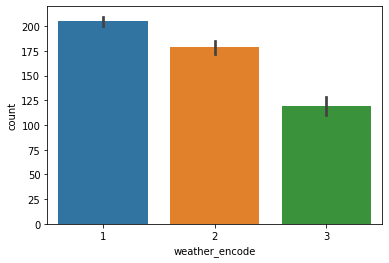

In [68]:
sns.barplot(data=train, x="weather_encode", y="count")

In [71]:
test["weather_encode"] = test["weather"].replace(4, 3)

test["weather_1"] = test["weather_encode"] == 1
test["weather_2"] = test["weather_encode"] == 2
test["weather_3"] = test["weather_encode"] == 3

print(test.shape)
test[["weather_encode", "weather_1", "weather_2", "weather_3"]].head()

(6493, 19)


,weather_encode,weather_1,weather_2,weather_3
0,1,True,False,False
1,1,True,False,False
2,1,True,False,False
3,1,True,False,False
4,1,True,False,False


### Windspeed

-- 시각화 이전

1. 풍속 데이터는 연속형 자료이므로 분포를 시각화하면 전형적인 정규 분포가 나올 것입니다.
2. 하지만 이 데이터는 현실 세계의 데이터이므로, 이론처럼 완벽한 정규 분포가 나오지는 않을 것입니다. 아마도 추측컨데 1) 몇몇 아웃라이어가 존재하거나, 2) 바람이 특별하게 많이 불어서 분포의 오른쪽이 길게 늘어지는 현상이 생길 것 같습니다.
3. 그리고 바람이 너무 많이 불면 사람들이 자전거를 덜 빌릴 것으로 예상합니다.

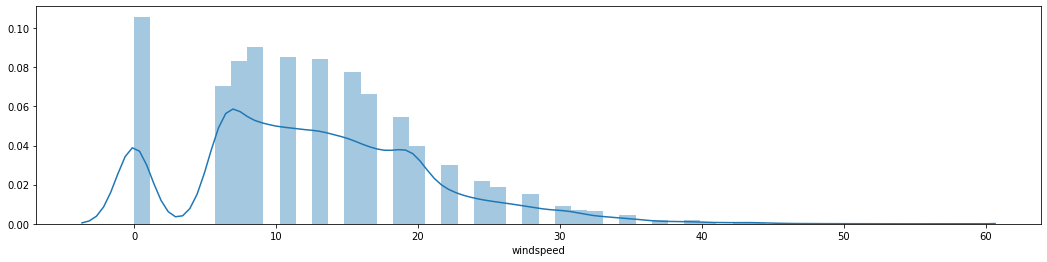

In [72]:
plt.figure(figsize=(18,4))

sns.distplot(train["windspeed"])

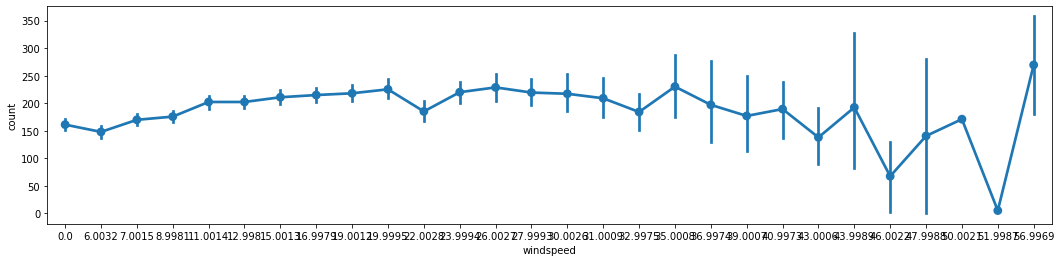

In [74]:
plt.figure(figsize=(18,4))

sns.pointplot(data=train, x="windspeed", y="count")

[0.    0.003 0.998 0.001 1.    0.998 0.001 0.998 0.001 0.003 0.003 0.999
 0.999 0.003 0.002 0.998 0.997 0.001 0.001 0.001 0.999 0.997 0.999 0.002
 0.002 0.001 0.997 0.999]


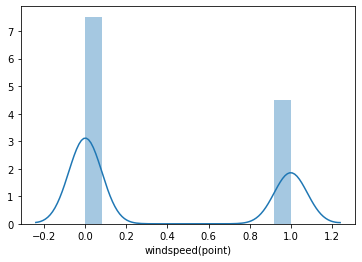

In [77]:
train["windspeed(point)"] = train["windspeed"] - train["windspeed"].astype('int')

print(train["windspeed(point)"].unique().round(3))

sns.distplot(train["windspeed(point)"])

-- 시각화 이후

1. 분포는 전반적으로 정규 분포가 나오지만, 1) 값이 연속적이지 않고 듬성듬성 떨어져 있습니다. 즉, 이 데이터는 연속형 데이터가 아닌 범주형 데이터에 가까워 보입니다.
2. 더 특이한건, 풍속이 0인 경우가 굉장히 많으며 정규 분포가 이상하게 보일 정도로 비중이 높습니다.
3. 또한 풍속이 과하게 높을수록 자전거를 덜 빌리는 현상이 보이는 것 같은데, 이는 전반적으로 모수가 부족한 듯 하여 신뢰도가 높지 않습니다. 다만 풍속이 낮을 경우에 전반적으로 자전거 대여량이 낮은 현상이 보입니다.

-- 예측모델 개선방안

1. 이 풍속 데이터를 머신러닝 알고리즘에 집어넣으면 머신러닝 알고리즘의 풍속에 따른 자전거 대여량의 변화를 스스로 판단할 수 있을 것 같습니다. 더 정확히는, 풍속이 낮거나 높을수록 자전거를 덜 빌리고, 풍속이 적당할 때 자전거를 더 많이 빌린다는 사실을 알 수 있습니다.
2. 풍속이 0인 경우는, 실제로는 풍속이 0이 아니라 값이 비어있을 가능성이 있습니다. 이 경우에는 풍속 데이터를 머신러닝 알고리즘에 그대로 집어넣을 경우, 실제로는 바람이 불었지만 머신러닝 알고리즘 입장에서는 바람이 불지 않았다고 간주할 수 있습니다. 이 문제를 해결해 준다면 머신러닝 알고리즘의 성능을 크게 끌어올릴 수 있을 것 같습니다.
3. 또한 풍속의 소수점을 자세히 보면 0.001, 0.002, 0.003이나, 0.999, 0.998, 0.997이 대부분입니다. 즉, 이 값은 실수형(float)이 아닌 정수형(int)이라고 간주할 수 있습니다. 알고리즘에 따라 다르겠지만, 풍속 데이터를 그대로 넣지 않고 반올림한 뒤 정수형(int) 데이터로 넣어주면 더 좋은 결과가 나올 수도 있습니다.


-- 사용할 feature

1. 정수형 데이터 만들기
2. 0값 처리 : 인터폴레이팅 찾아보기

windspeed_w, windspeed_s

In [243]:
train["windspeed_int"] = round(train["windspeed"],0)

print(train.shape)
train[["windspeed", "windspeed_int"]].head()

(10886, 24)


,windspeed,windspeed_int
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [244]:
train["windspeed_fillin"] = train["windspeed_int"].replace(0, float("NaN"))

train["windspeed_fillin"] = train["windspeed_fillin"].interpolate(method='values')

print(train.shape)

train[["windspeed", "windspeed_int", "windspeed_fillin"]].head()

(10886, 25)


,windspeed,windspeed_int,windspeed_fillin
0,0.0,0.0,NaN
1,0.0,0.0,NaN
2,0.0,0.0,NaN
3,0.0,0.0,NaN
4,0.0,0.0,NaN


In [268]:
train[train["datetime"] == "2012-01-01 00:00:00"]

train.loc[train["datetime"]=="2011-01-01 00:00:00", "windspeed_fillin"] = 10

train["windspeed_fillin"] = round(train["windspeed_fillin"].interpolate(method='values'), 0)

print(train.shape)
train[["windspeed", "windspeed_fillin"]].head()

(10886, 25)


,windspeed,windspeed_fillin
0,0.0,10.0
1,0.0,9.0
2,0.0,8.0
3,0.0,8.0
4,0.0,7.0


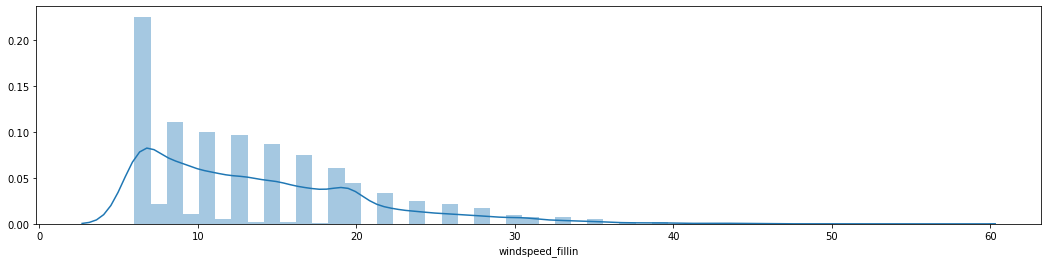

In [270]:
plt.figure(figsize=(18,4))
sns.distplot(train["windspeed_fillin"])

In [263]:
test["windspeed_int"] = round(test["windspeed"],0)

print(test.shape)
test[["windspeed", "windspeed_int"]].head()

(6493, 20)


,windspeed,windspeed_int
0,26.0027,26.0
1,0.0000,0.0
2,0.0000,0.0
3,11.0014,11.0
4,11.0014,11.0


In [265]:
test["windspeed_fillin"] = test["windspeed_int"].replace(0, float("NaN"))

test["windspeed_fillin"] = test["windspeed_fillin"].interpolate(method='values')

print(test.shape)

test[["windspeed", "windspeed_int", "windspeed_fillin"]].head()

(6493, 21)


,windspeed,windspeed_int,windspeed_fillin
0,26.0027,26.0,26.0
1,0.0000,0.0,21.0
2,0.0000,0.0,16.0
3,11.0014,11.0,11.0
4,11.0014,11.0,11.0


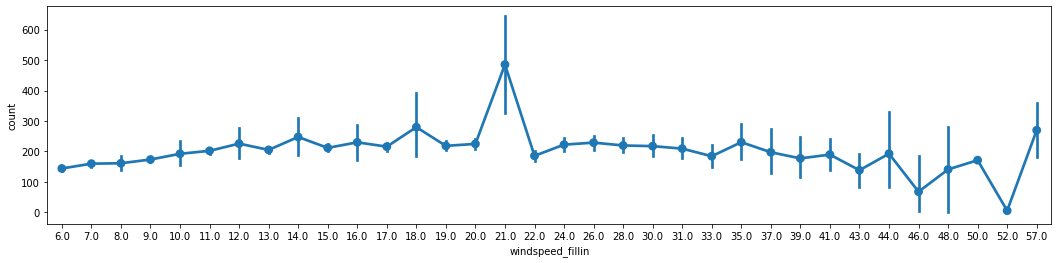

In [272]:
plt.figure(figsize=(18,4))

sns.pointplot(data=train, x="windspeed_fillin", y="count")

In [275]:
train.loc[train["windspeed_fillin"] <= 21, "windspeed_encode"] = "weak"
train.loc[train["windspeed_fillin"] > 21, "windspeed_encode"] = "strong"

train["windspeed_w"] = train["windspeed_encode"] == "weak"
train["windspeed_s"] = train["windspeed_encode"] == "strong"

print(train.shape)
train[["windspeed_fillin", "windspeed_encode", "windspeed_w", "windspeed_s"]].head()

(10886, 28)


,windspeed_fillin,windspeed_encode,windspeed_w,windspeed_s
0,10.0,weak,True,False
1,9.0,weak,True,False
2,8.0,weak,True,False
3,8.0,weak,True,False
4,7.0,weak,True,False


In [277]:
test.loc[test["windspeed_fillin"] <= 21, "windspeed_encode"] = "weak"
test.loc[test["windspeed_fillin"] > 21, "windspeed_encode"] = "strong"

test["windspeed_w"] = test["windspeed_encode"] == "weak"
test["windspeed_s"] = test["windspeed_encode"] == "strong"

print(test.shape)
test[["windspeed_fillin", "windspeed_encode", "windspeed_w", "windspeed_s"]].head()

(6493, 24)


,windspeed_fillin,windspeed_encode,windspeed_w,windspeed_s
0,26.0,strong,False,True
1,21.0,weak,True,False
2,16.0,weak,True,False
3,11.0,weak,True,False
4,11.0,weak,True,False


###  temp

-- 시각화 이전

1. 풍속 데이터와 마찬가지로, 이 데이터는 연속형 자료이므로 분포를 시각화하면 전형적인 정규분포가 나올 것입니다.
2. 또한 온도가 높으면 자전거를 덜 빌릴 것 같고, 정 반대로 온도가 낮으면 자전거를 많이 빌릴 것 같습니다. 하지만 온도가 너무 낮은 경우는 자전거를 덜 빌릴 것 같습니다.
3. 온도와 체감온도는 서로 상관관계가 높으며, 사실상 거의 같은 성향의 데이터라고 간주할 수 있습니다.

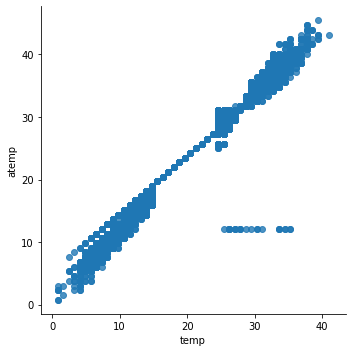

In [279]:
sns.lmplot(data=train, x="temp", y="atemp", fit_reg=False)

In [280]:
train["temp"].unique()

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

In [281]:
train["atemp"].unique()

array([14.395, 13.635, 12.88 , 17.425, 19.695, 16.665, 21.21 , 22.725,
       21.97 , 20.455, 11.365, 10.605,  9.85 ,  8.335,  6.82 ,  5.305,
        6.06 ,  9.09 , 12.12 ,  7.575, 15.91 ,  3.03 ,  3.79 ,  4.545,
       15.15 , 18.18 , 25.   , 26.515, 27.275, 29.545, 23.485, 25.76 ,
       31.06 , 30.305, 24.24 , 18.94 , 31.82 , 32.575, 33.335, 28.79 ,
       34.85 , 35.605, 37.12 , 40.15 , 41.665, 40.91 , 39.395, 34.09 ,
       28.03 , 36.365, 37.88 , 42.425, 43.94 , 38.635,  1.515,  0.76 ,
        2.275, 43.18 , 44.695, 45.455])

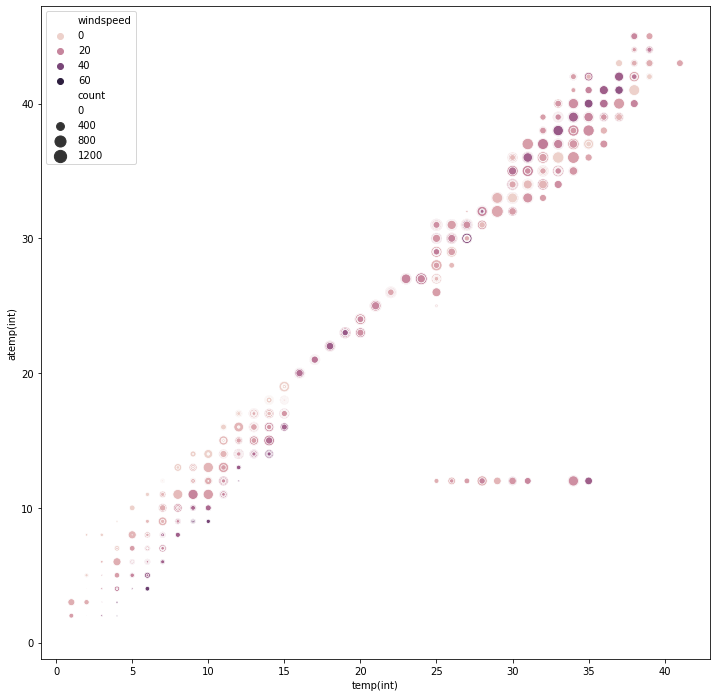

In [284]:
train["temp(int)"] = train["temp"].round()
train["atemp(int)"] = train["atemp"].round()

plt.figure(figsize=(12,12))

sns.scatterplot(data=train, x="temp(int)", y="atemp(int)", hue="windspeed", size="count", sizes=(0,150))

In [285]:
train["temp(difference)"] = train["temp(int)"] - train["atemp(int)"]

print(train.shape)
train[["temp(int)", "atemp(int)", "temp(difference)"]].head()

(10886, 31)


,temp(int),atemp(int),temp(difference)
0,10.0,14.0,-4.0
1,9.0,14.0,-5.0
2,9.0,14.0,-5.0
3,10.0,14.0,-4.0
4,10.0,14.0,-4.0


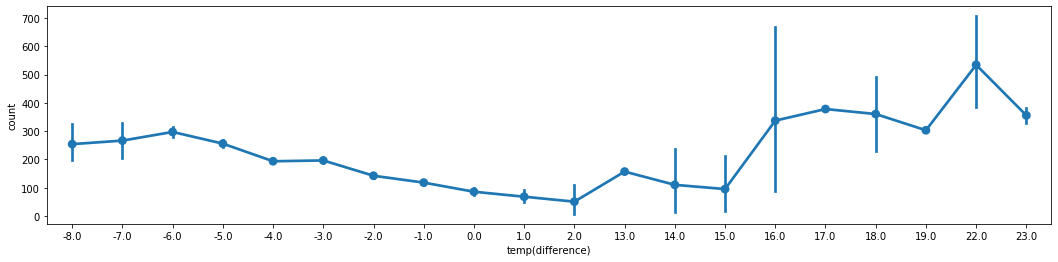

In [287]:
plt.figure(figsize=(18,4))

sns.pointplot(data=train, x="temp(difference)", y="count")

In [291]:
train.loc[train["temp(difference)"] < -6, "temp(difference)"] = -6
train.loc[train["temp(difference)"] > 0, "temp(difference)"] = 0

train["temp(difference)"].value_counts()

-4.0    5106
-3.0    2097
-2.0    1415
-5.0    1049
-1.0     509
-6.0     431
 0.0     279
Name: temp(difference), dtype: int64

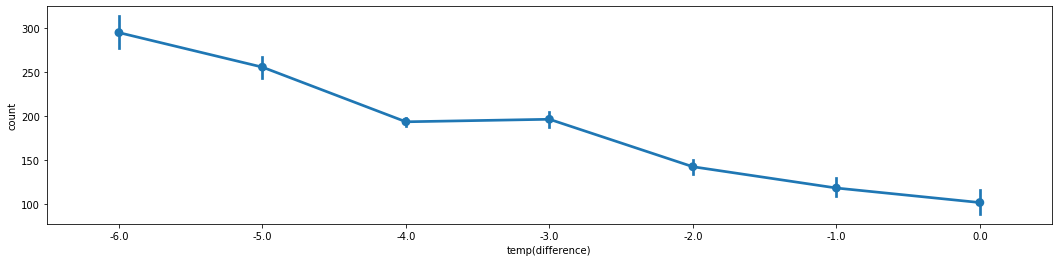

In [293]:
plt.figure(figsize=(18,4))
sns.pointplot(data=train, x="temp(difference)", y="count")

-- 시각화 이후

1. 온도와 체감온도는 연속형 데이터이며, 서로 상관관계가 높다는 사실을 알 수 있습니다.
2. 또한 온도나 체감온도가 낮을수록 자전거를 덜 빌리고, 높을수록 자전거를 많이 빌린다는 사실을 알 수 있습니다.
3. 하지만 가끔 온도에 비해서 체감온도가 상대적으로 높거나 낮은 경우가 있는데, 특히나 체감온도가 온도보다 높을 경우 자전거를 더 많이 빌린다는 현상을 알 수 있습니다.

-- 예측모델 개선방안

1. 온도 컬럼이 자전거 대여량을 예측하는 데 도움이 된다는 사실을 알 수 있습니다. 이 컬럼을 머신러닝 알고리즘에 넣어주면 머신러닝 알고리즘이 온도에 따른 자전거 대여량의 변화량을 예측하면서 성능이 올라갈 것으로 보입니다.
2. 또한 비슷하게 체감온도도 자전거 대여량을 예측하는 데 도움이 됩니다. 다만 온도와 체감온도는 서로 비슷한 성향을 가지기 때문에, 두 컬럼 모두를 넣는 건 둘 중 하나만 넣는 것에 비해 머신러닝 알고리즘의 성능을 향상시키는 데 큰 도움을 주지는 못할 것입니다.
3. 또한 온도와 체감온도의 차이가 자전거 대여량을 예측하는 데 도움이 된다는 새로운 사실을 알 수 있었습니다. 이 정보를 머신러닝 알고리즘에 넣어주면 머신러닝의 성능향상을 꾀할 수 있을 것으로 보입니다.

-- 사용할 feature

temp(difference)

In [294]:
test["temp(int)"] = test["temp"].round()
test["atemp(int)"] = test["atemp"].round()

test["temp(difference)"] = test["temp(int)"] - test["atemp(int)"]

print(test.shape)
test[["temp(int)", "atemp(int)", "temp(difference)"]].head()

(6493, 27)


,temp(int),atemp(int),temp(difference)
0,11.0,11.0,0.0
1,11.0,14.0,-3.0
2,11.0,14.0,-3.0
3,11.0,13.0,-2.0
4,11.0,13.0,-2.0


### datetime-dayofweek

In [303]:
train["datetime-dayofweek"] = train["datetime"].dt.day_name()

print(train.shape)
train[["datetime", "datetime-dayofweek"]].head()

(10886, 32)


,datetime,datetime-dayofweek
0,2011-01-01 00:00:00,Saturday
1,2011-01-01 01:00:00,Saturday
2,2011-01-01 02:00:00,Saturday
3,2011-01-01 03:00:00,Saturday
4,2011-01-01 04:00:00,Saturday


In [304]:
test["datetime-dayofweek"] = test["datetime"].dt.day_name()

print(test.shape)
test[["datetime", "datetime-dayofweek"]].head()

(6493, 28)


,datetime,datetime-dayofweek
0,2011-01-20 00:00:00,Thursday
1,2011-01-20 01:00:00,Thursday
2,2011-01-20 02:00:00,Thursday
3,2011-01-20 03:00:00,Thursday
4,2011-01-20 04:00:00,Thursday


-- 시각화 이전

1. 사람의 생활 패턴은 주중/주말에 따라 극명하게 달라집니다. 그런 의미에서 요일 컬럼을 시각화하면 어떤 요일이냐에 따라서 자전거 대여량이 다르게 시각화 될 것 같습니다.
2. 하지만 비슷한 성향을 가진 workingday 컬럼과는 달리, 요일 컬럼은 같은 주말이라고 하더라도 토/일의 차이, 같은 주중이라고 하더라도 월/수/금의 차이가 드러날 것입니다.
3. 그리고 사람의 구체적인 생활 패턴에 다라 자전거의 대여량이 달라질 것으로 예상합니다. 가령 출퇴근 하는 날인지(출퇴근 시간에 대여량이 많을 것으로 예상), 주말에 노는 날인지(낮에 대여량이 많을 것으로 예상)에 따라 자전거 대여량이 달라질 것입니다.

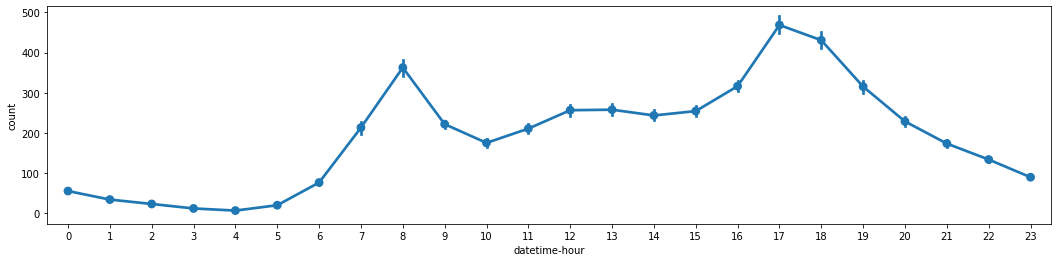

In [308]:
plt.figure(figsize=(18,4))

sns.pointplot(data=train, x="datetime-hour", y="count")

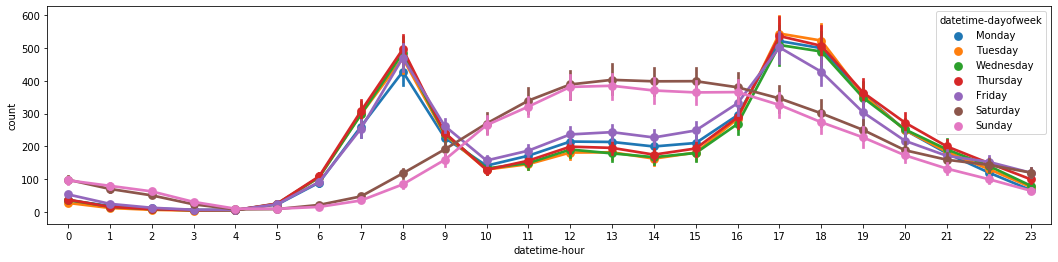

In [309]:
plt.figure(figsize=(18,4))

dayofweek_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", hue_order = dayofweek_order)

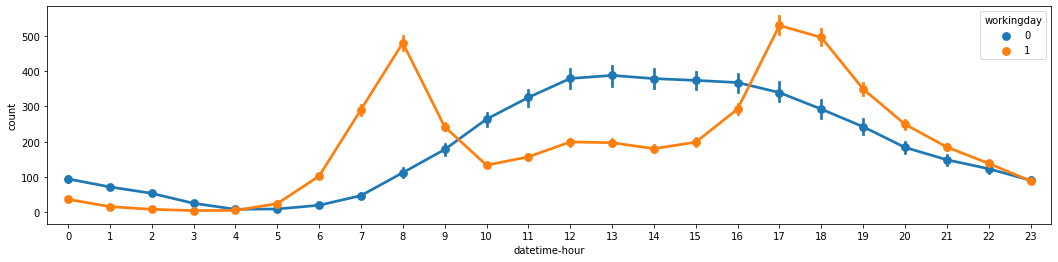

In [307]:
plt.figure(figsize=(18,4))

sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday")

-- 시각화 이후

확실히 주중/주말을 나누는 workingday 컬럼에 비해, 구체적인 요일을 나타내는 datetime-dayofweek 컬럼이 더 디테일한 자전거 변화량을 나타낸다는 사실을 알 수 있습니다. 구체적으로는,

1. 같은 주말이라고 하더라도 일요일보다 토요일 자전거 대여량이 많습니다. 이는 추측컨데 일요일은 다음 날이 근무일(월요일)이므로, 액티비티를 즐기고 싶다면 토요일에 즐기고 싶다는 고객들의 성향이 드러난 게 아닐까 싶습니다.
2. 비슷한 관점에서, 같은 주중이라도 금요일이 퇴근하는 시간대(18-20시)에 자전거 대여량이 다른 주중에 비해 낮습니다. 이는 추측컨데 다음날이 휴일(토요일)이므로, 금요일 밤을 즐기기 위해 차를 몰고 왔거나, 음주 후 차량이나 자전거를 이용할 수 없어서 다른 대중교통(버스, 지하철, 택시 등)을 이용한 게 아닐까 생각합니다.
3. 또한 금요일은 같은 주중이라고 하더라도 오후 시간대(10-16시)에 자전거 대여량이 높습니다. 그리고 다음높은 주중이 월요일입니다. 이는 금요일과 월요일은 주중임에도 불구하고 주말과 끼어있는 요일이기 때문에, 주말의 성향을 어느 정도 타는 게 아닐가 싶습니다.

-- 예측모델 개선 방안

1. 일단 요일 컬럼을 머신러닝 모델에 적용하면, 머신러닝 모델이 요일에 따른 자전거 변화량의 차이를 이해하기 시작하면서 성능이 올라갈 것으로 예상합니다.
2. 구체적으로는 같은 주말이라고 하더라도 토요일과 일요일의 차이, 같은 주중이라고 하더라도 수요일과 월요일의 차이를 이해하기 시작할 것입니다. 이런 점에서 근무일 컬럼만 넣는 것 보다 요일 컬럼을 넣는 것이 더 좋은 성능을 낼 것입니다.
3. 그리고 이 데이터는 연속적 데이터가 아닌 범주형 데이터 입니다. 그 의미는, 이 데이터를 그대로 넣지 않고 One Hot Encoding을 해서 넣어주는 것이 머신러닝 알고리즘이 이해하기 쉽고, 더 좋은 성능을 낼 것으로 예상합니다.

-- 사용할 feature

1. 요일별 One Hot Encoding

"datetime-dayofweek", "dayofweek_Mon", "dayofweek_Tue", "dayofweek_Wed", 
"dayofweek_Thu", "dayofweek_Fri", "dayofweek_Sat","dayofweek_Sun" 

In [311]:
train["dayofweek_Mon"] = train["datetime-dayofweek"]== "Monday"
train["dayofweek_Tue"] = train["datetime-dayofweek"]== "Tuesday"
train["dayofweek_Wed"] = train["datetime-dayofweek"]== "Wednesday"
train["dayofweek_Thu"] = train["datetime-dayofweek"]== "Thursday"
train["dayofweek_Fri"] = train["datetime-dayofweek"]== "Friday"
train["dayofweek_Sat"] = train["datetime-dayofweek"]== "Saturday"
train["dayofweek_Sun"] = train["datetime-dayofweek"]== "Sunday"

print(train.shape)
train[["datetime-dayofweek", "dayofweek_Mon", "dayofweek_Tue", "dayofweek_Wed", 
       "dayofweek_Thu", "dayofweek_Fri", "dayofweek_Sat","dayofweek_Sun" ]].head()

(10886, 39)


,datetime-dayofweek,dayofweek_Mon,dayofweek_Tue,dayofweek_Wed,dayofweek_Thu,dayofweek_Fri,dayofweek_Sat,dayofweek_Sun
0,Saturday,False,False,False,False,False,True,False
1,Saturday,False,False,False,False,False,True,False
2,Saturday,False,False,False,False,False,True,False
3,Saturday,False,False,False,False,False,True,False
4,Saturday,False,False,False,False,False,True,False


In [312]:
test["dayofweek_Mon"] = test["datetime-dayofweek"]== "Monday"
test["dayofweek_Tue"] = test["datetime-dayofweek"]== "Tuesday"
test["dayofweek_Wed"] = test["datetime-dayofweek"]== "Wednesday"
test["dayofweek_Thu"] = test["datetime-dayofweek"]== "Thursday"
test["dayofweek_Fri"] = test["datetime-dayofweek"]== "Friday"
test["dayofweek_Sat"] = test["datetime-dayofweek"]== "Saturday"
test["dayofweek_Sun"] = test["datetime-dayofweek"]== "Sunday"

print(test.shape)
test[["datetime-dayofweek", "dayofweek_Mon", "dayofweek_Tue", "dayofweek_Wed", 
       "dayofweek_Thu", "dayofweek_Fri", "dayofweek_Sat","dayofweek_Sun" ]].head()

(6493, 35)


,datetime-dayofweek,dayofweek_Mon,dayofweek_Tue,dayofweek_Wed,dayofweek_Thu,dayofweek_Fri,dayofweek_Sat,dayofweek_Sun
0,Thursday,False,False,False,True,False,False,False
1,Thursday,False,False,False,True,False,False,False
2,Thursday,False,False,False,True,False,False,False
3,Thursday,False,False,False,True,False,False,False
4,Thursday,False,False,False,True,False,False,False


### Casual & Registered

-- 시각화 이전

1. 바쁜 출퇴근 시간에 자전거를 빌리는 사람들은 고객 등록 절차를 거치지 않아도 되는 기존 등록 고객일 확률이 높습니다. 따라서 Registered 고객의 대여량 분포는 평일 분포와 유사하게 나타날 것으로 예상됩니다.
2. Casual 이용자들은 자전거를 빌리고 싶을 때 대여를 하기 때문에, 출퇴근 시간 보다는 낮-오후 시간대에 대여량이 많을 것 같습니다.
3. 그러나 Causal 이용자들은 비정기적으로 자전거를 대여하기 때문에, 대여량 패턴이 뚜렷하지는 않을 것 같습니다.

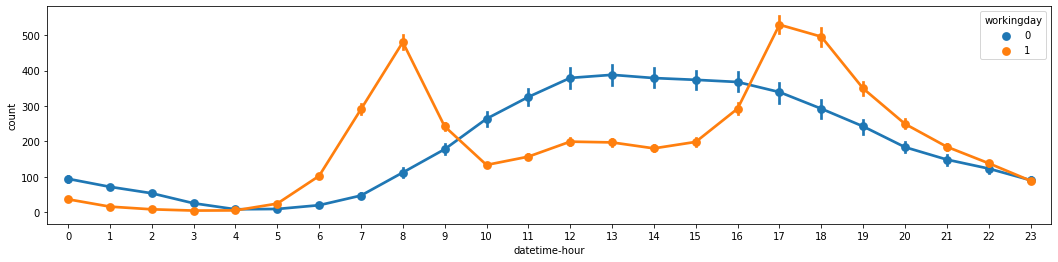

In [316]:
plt.figure(figsize=(18,4))
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday")

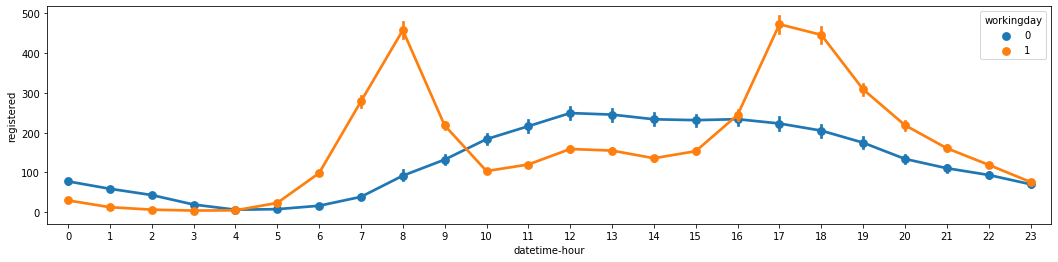

In [317]:
plt.figure(figsize=(18,4))
sns.pointplot(data=train, x="datetime-hour", y="registered", hue="workingday")

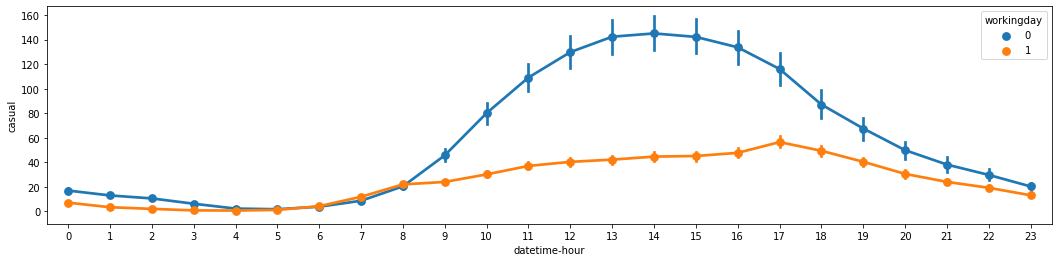

In [318]:
plt.figure(figsize=(18,4))
sns.pointplot(data=train, x="datetime-hour", y="casual", hue="workingday")

-- 시각화 이후

1. 시간에 따른 자전거 대여량의 변화량을 비교해보니, 비회원과 회원의 차이가 극명하게 난다는 사실을 알 수 있습니다.
2. 구체적으로는, 회원은 주로 출퇴근할 대 자전거를 빌리고, 비회원은 주로 주말에 놀대 자전거를 빌린다는 사실을 알 수 있습니다.
3. 그리고 세로축(y축)을 보면 비회원보다는 회원이 자전거를 더 많이 빌린다는 사실을 알 수 있습니다.

-- 예측모델 개선방안

1. 일단, 비회원과 회원 정보는 test 데이터에 넣을 수 없기 때문에 feature로 활용할 수 없습니다.
2. 하지만 다른 방식을 통해서 유사하게 이 데이터를 쓸 수 있을 것 같습니다. 가령 머신러닝 모델로 자전거 대여량을 나타내는 count 컬럼을 예측하는 게 아닌, 비회원과 회원 컬럼을 각각 label로 간주하고 예측한 뒤 이를 더하는 것도 방법입니다.
3. 내지는 비회원 컬럼의 값이 작고 패턴을 예측하기 어렵기 대문에, 비회원, 회원, 그리고 count 컬럼가지 총 3개를 동시에 예측해서 이를 섞어쓰는 것도 가능합니다.

-- 사용할 label

1. casual, registered 각각 fit시켜서 예측하기
2. casual + registered 더해서 count 도출

### Season

-- 시각화 이전

1. 값이 1,2,3,4로 되어 있지만, 연속형 데이터가 아닌 범주형 데이터로 처리해야 할 것입니다.
2. datetime-month 분석결과를 고려할 때, 여름의 대여량이 가장 많고, 겨울의 대여량이 가장 적게 나타날 것 같습니다.
3. 그리고 봄보다 가을의 대여량이 더 많을 것으로 예상됩니다.

In [322]:
def season_encode(month):
    if month in [3,4,5]:
        return "spring"
    elif month in [6,7,8]:
        return "summer"
    elif month in [9,10,11]:
        return "fall"
    else:
        return "winter"
    
train["season_encode"] = train["datetime-month"].apply(season_encode)

print(train.shape)
train[["datetime-month", "season_encode"]].head()

(10886, 40)


,datetime-month,season_encode
0,1,winter
1,1,winter
2,1,winter
3,1,winter
4,1,winter


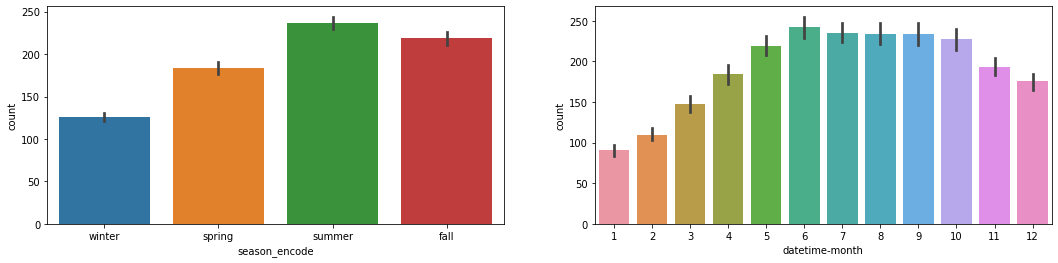

In [330]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,4)

sns.barplot(data=train, x="season_encode", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)

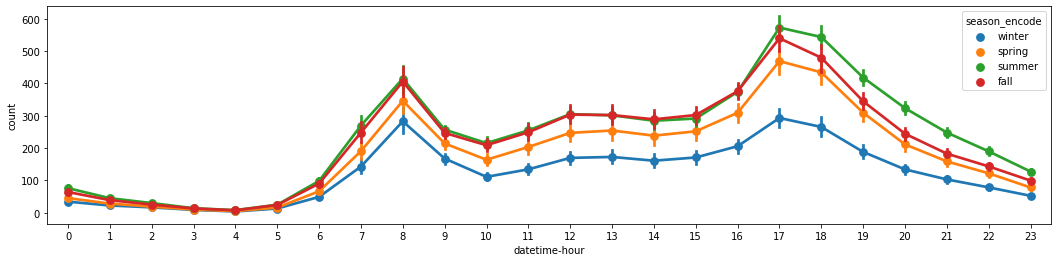

In [328]:
plt.figure(figsize=(18,4))

sns.pointplot(data=train, x="datetime-hour", y="count", hue="season_encode")

In [329]:
def season_encode(month):
    if month in [3,4,5]:
        return "spring"
    elif month in [6,7,8]:
        return "summer"
    elif month in [9,10,11]:
        return "fall"
    else:
        return "winter"
    
test["season_encode"] = test["datetime-month"].apply(season_encode)

print(test.shape)
test[["datetime-month", "season_encode"]].head()

(6493, 36)


,datetime-month,season_encode
0,1,winter
1,1,winter
2,1,winter
3,1,winter
4,1,winter


-- 시각화 이후

1. 예상했던 대로 겨울의 대여량이 가장 낮고, 여름의 대여량이 가장 높다는 사실을 알 수 있습니다.
2. 봄과 가을 중에서는 가을의 대여량이 봄보다 살짝 높습니다. 이는 추측컨데, 봄은 추운 겨울과 연결된 계절로서 겨울의 대여 패턴이 남아있기 때문이라고 생각됩니다.
3. 계절 컬럼의 대여량은 month 컬럼에 기반한 것이므로, 월별 평균 자전거 대여량 분포와 유사합니다. 

ㅡㅡ 예측모델 개선방안
1. 계절 컬럼은 범주형 데이터로서 머신러닝 모델에 적용한다면, 머신러닝 모델이 계절에 따른 자전거 대여량의 차이를 이해하기 시작하면서 성능이 올라갈 것으로 예상합니다.

2. 그러나 계절 컬럼을 사용할 경우 3개월 단위의 평균 대여량만을 알 수 있기 때문에, 월별 대여량의 미세한 차이를 알 수 없습니다. 그러므로 season 컬럼만 단독으로 사용하는 것보다는 datetime-month 컬럼을 함께 사용하는 것이 더 좋은 성능을 낼 것입니다. 구체적으로는 같은 봄이라고 하더라도 3월과 5월의 차이, 같은 겨울이라고 하더라도 12월과1월의 차이를 이해하기 시작할 것입니다. 

3. 그리고 계절 데이터는 연속적 데이터가 아닌 범주형 데이터입니다. 이 데이터를 그대로 넣지 않고 One Hot Encoding을 해서 넣어주는 것이 머신러닝 알고리즘이 이해하기 쉽고, 더 좋은 성능을 낼 것으로 예상합니다.

-- 사용할 feature

"season_spring", "season_summer", "season_fall", "season_winter"

In [325]:
train["season_spring"] = train["season_encode"] == "spring"
train["season_summer"] = train["season_encode"] == "summer"
train["season_fall"] = train["season_encode"] == "fall"
train["season_winter"] = train["season_encode"] == "winter"

print(train.shape)
train[["season_encode", "season_spring", "season_summer", "season_fall", "season_winter"]].head()

(10886, 44)


,season_encode,season_spring,season_summer,season_fall,season_winter
0,winter,False,False,False,True
1,winter,False,False,False,True
2,winter,False,False,False,True
3,winter,False,False,False,True
4,winter,False,False,False,True


In [331]:
test["season_spring"] = test["season_encode"] == "spring"
test["season_summer"] = test["season_encode"] == "summer"
test["season_fall"] = test["season_encode"] == "fall"
test["season_winter"] = test["season_encode"] == "winter"

print(test.shape)
test[["season_encode", "season_spring", "season_summer", "season_fall", "season_winter"]].head()

(6493, 40)


,season_encode,season_spring,season_summer,season_fall,season_winter
0,winter,False,False,False,True
1,winter,False,False,False,True
2,winter,False,False,False,True
3,winter,False,False,False,True
4,winter,False,False,False,True


### Holiday

-- 시각화 이전

1. 시간별 대여량에서 출퇴근 시간 비율이 높게 나타난 것으로 보아, 공휴일이 아닐 때에는 출퇴근 시간대에 자전거를 빌리는 사람이 많을 것입니다.
2. 공휴일에는 주말처럼 낮~오후 시간대에 대여량이 높게 나타날 것 같습니다.
3. 공휴일 여부와 상관없이 밤~새벽 시간대 자전거를 빌리는 사람은 적을 것 같습니다.

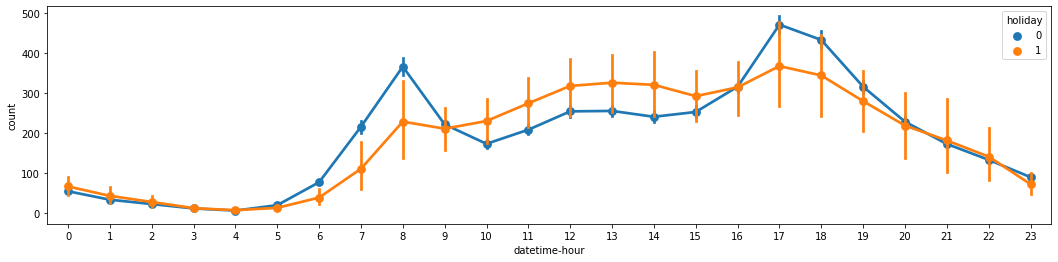

In [333]:
plt.figure(figsize=(18,4))

sns.pointplot(data=train, x="datetime-hour", y="count", hue="holiday")

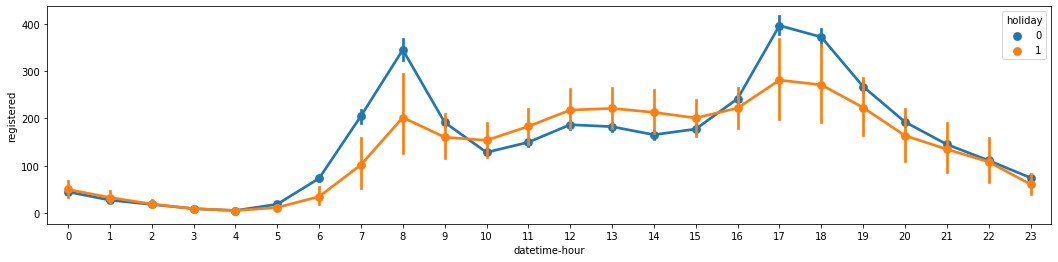

In [334]:
plt.figure(figsize=(18,4))

sns.pointplot(data=train, x="datetime-hour", y="registered", hue="holiday")

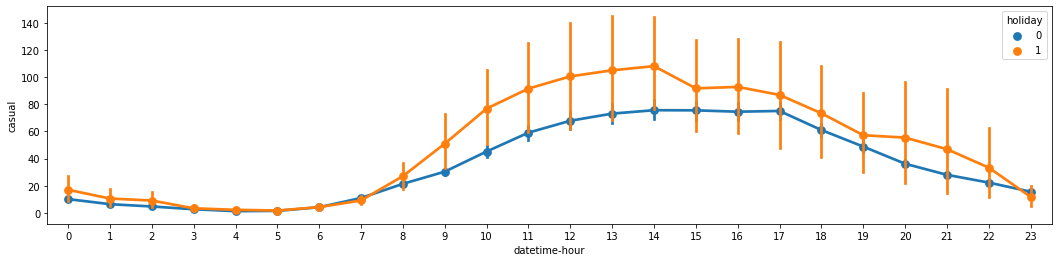

In [335]:
plt.figure(figsize=(18,4))

sns.pointplot(data=train, x="datetime-hour", y="casual", hue="holiday")

-- 시각화 이후

1. 예상했던 대로 공휴일이 아닐 때에는 출퇴근 시간에 자전거 대여량이 많다는 사실을 알 수 있습니다.
2. 그러나 공휴일에도 회원(registered) 고객에 한해 출퇴근 시간의 대여량이 높게 나타나고 있습니다. 이는 추측컨데, 출퇴근을 위해 회원등록을 한 사람들이 공휴일임에도 불구하고 쉬지 못하고 출근을 하면서 자전거를 이용했기 때문이라고 생각됩니다. 
3. casual 고객의 경우 공휴일 여부에 상관없이 낮-오후 시간대에 주로 자전거를 빌리는 것을 알 수 있습니다. 다만 공휴일 대여량이 비공휴일 대여량보다 높게 나타나고 있습니다. 이는 추측컨데 공휴일에는 비공휴일보다 야외활동을 할 수 있는 시간이 많기 때문에, 자전거를 빌리는 사람이 많은 것이라고 생각됩니다.

-- 예측모델 개선방안

1. 공휴일의 대여량은 비공휴일의 대여량에 비해 출퇴근 시간의 대여량이 적고, 낮-오후 시간대의 대여량보다 많습니다. 따라서 해당 컬럼을 머신러닝 모델에 적용하면, 모델이 공휴일 여부에 따른 대여량 차이를 이해하기 시작하면서 성능이 좋아질 것입니다.
2. 또한 회원과 비회원의 대여량이 공휴일 여부에 따라 패턴이 극명한 차이를 보이고 있기 때문에, 회원/비회원을 각각 label로 사용한다면 모델의 성능을 더 높일 수 있을 것입니다.
3. holiday 컬럼은 범주형 데이터이지만, 그 범주가 0과 1이기 때문에 One Hot Encoding을 따로 하지 않고 그대로 feature를 사용해도 될 것입니다.

-- 사용할 feature

holiday

### Humidity

-- 시각화 이전

1. 습도는 연속형 데이터이므로, 이 데이터를 시각화하면 정규분포 형태를 보일 것입니다.
2. 하지만 습도가 정수형 데이터이기 때문에, 적절히 범주화해서 분석하면 새로운 패턴을 발견할 수도 있을 것 같습니다.
3. 전반적으로 습도가 높을수록 자전거 대여량이 낮아질 것 같습니다.

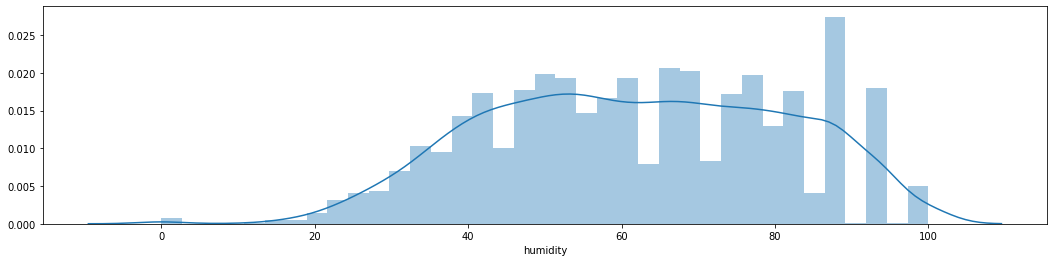

In [340]:
plt.figure(figsize=(18,4))

sns.distplot(train["humidity"])

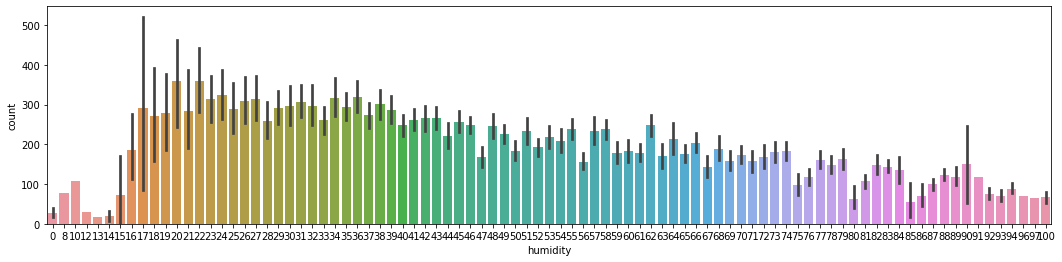

In [348]:
plt.figure(figsize=(18,4))

sns.barplot(data=train, x="humidity", y="count")

In [351]:
train["humidity"].unique()

array([ 81,  80,  75,  86,  76,  77,  72,  82,  88,  87,  94, 100,  71,
        66,  57,  46,  42,  39,  44,  47,  50,  43,  40,  35,  30,  32,
        64,  69,  55,  59,  63,  68,  74,  51,  56,  52,  49,  48,  37,
        33,  28,  38,  36,  93,  29,  53,  34,  54,  41,  45,  92,  62,
        58,  61,  60,  65,  70,  27,  25,  26,  31,  73,  21,  24,  23,
        22,  19,  15,  67,  10,   8,  12,  14,  13,  17,  16,  18,  20,
        85,   0,  83,  84,  78,  79,  89,  97,  90,  96,  91], dtype=int64)

In [361]:
train["humidity"].value_counts().tail()

13    1
10    1
12    1
96    1
91    1
Name: humidity, dtype: int64

In [379]:
train["humidity(int)"] = train["humidity"].round(-1)

train.loc[train["humidity(int)"] == 0, "humidity(int)"] = 10
train.loc[train["humidity(int)"] == 10, "humidity(int)"] = 20

train["humidity(int)"].value_counts().head(20)

60     1977
50     1675
80     1671
40     1609
70     1588
90     1383
30      615
20      218
100     150
Name: humidity(int), dtype: int64

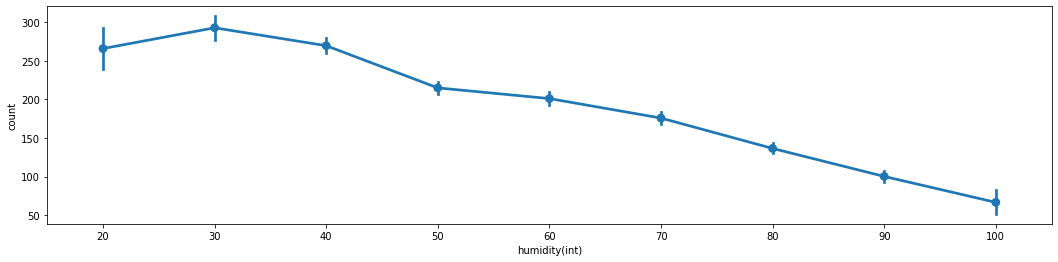

In [380]:
plt.figure(figsize=(18,4))
sns.pointplot(data=train, x="humidity(int)", y="count")

-- 시각화 이후

1. 습도는 연속형 데이터로서 전반적으로 정규분포 되어 있지만, 습도 90-100 구간 중 일부가 비어있습니다.
2. 이를 해결하기 위해 습도를 10의 단위로 범주화 하여 분석한 결과, 습도가 높을수록 자전거 대여량이 낮아진다는 사실을 알 수 있었습니다. 이는 추측컨데, 습도가 높을 경우 활동적인 야외활동을 할 때 땀이 많이 나기 때문에 자전거를 빌리는 사람이 줄어들고, 나아가 습도가 90-100 정도 되면 비가 온다는 것을 의미하므로 자전거 대여량이 감소하는 것이라고 생각됩니다.
3. 하지만 습도가 20 이하로 낮은 구간에서는 오히려 자전거 대여량이 감소하는 현상이 나타납니다.

-- 예측모델 개선방안

1. 습도 컬럼이 자전거 대여량을 예측하는 데 도움이 된다는 사실을 알 수 있습니다. 이 컬럼을 머신러닝 알고리즘에 넣어주면 머신러닝 알고리즘이 습도에 따른 자전거 대여량의 변화량을 예측하면서 성능이 올라갈 것으로 보입니다.
2. 다만 습도 컬럼을 그대로 적용하기 보다는, 10의 단위로 범주화한 humidity(int) 컬럼을 사용하는 것이 알고리즘 성능을 높이는 데 도움이 될 수 있을 것입니다.

-- 사용할 feature

huminity(int)

In [381]:
test["humidity(int)"] = test["humidity"].round(-1)

test.loc[train["humidity(int)"] == 0, "humidity(int)"] = 10
test.loc[train["humidity(int)"] == 10, "humidity(int)"] = 20

test["humidity(int)"].value_counts().head(10)

60     1143
80     1111
90      978
70      964
40      871
50      849
30      362
100     124
20       91
Name: humidity(int), dtype: int64

### Train

In [435]:
feature_names = ["datetime-year", "datetime-month", "datetime-hour", 
                 "weather_1", "weather_2", "weather_3",
                 "windspeed_fillin", "temp", "temp(difference)",
                 "dayofweek_Mon", "dayofweek_Tue", "dayofweek_Wed", "dayofweek_Thu",
                 "dayofweek_Fri", "dayofweek_Sat","dayofweek_Sun", "workingday",
                 "season_spring", "season_summer", "season_fall", "season_winter", 
                 "holiday", "humidity(int)"]

feature_names

['datetime-year',
 'datetime-month',
 'datetime-hour',
 'weather_1',
 'weather_2',
 'weather_3',
 'windspeed_fillin',
 'temp',
 'temp(difference)',
 'dayofweek_Mon',
 'dayofweek_Tue',
 'dayofweek_Wed',
 'dayofweek_Thu',
 'dayofweek_Fri',
 'dayofweek_Sat',
 'dayofweek_Sun',
 'workingday',
 'season_spring',
 'season_summer',
 'season_fall',
 'season_winter',
 'holiday',
 'humidity(int)']

In [436]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 23)


,datetime-year,datetime-month,datetime-hour,weather_1,weather_2,weather_3,windspeed_fillin,temp,temp(difference),dayofweek_Mon,...,dayofweek_Fri,dayofweek_Sat,dayofweek_Sun,workingday,season_spring,season_summer,season_fall,season_winter,holiday,humidity(int)
0,2011,1,0,True,False,False,10.0,9.84,-4.0,False,...,False,True,False,0,False,False,False,True,0,80
1,2011,1,1,True,False,False,9.0,9.02,-5.0,False,...,False,True,False,0,False,False,False,True,0,80
2,2011,1,2,True,False,False,8.0,9.02,-5.0,False,...,False,True,False,0,False,False,False,True,0,80
3,2011,1,3,True,False,False,8.0,9.84,-4.0,False,...,False,True,False,0,False,False,False,True,0,80
4,2011,1,4,True,False,False,7.0,9.84,-4.0,False,...,False,True,False,0,False,False,False,True,0,80


In [437]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 23)


,datetime-year,datetime-month,datetime-hour,weather_1,weather_2,weather_3,windspeed_fillin,temp,temp(difference),dayofweek_Mon,...,dayofweek_Fri,dayofweek_Sat,dayofweek_Sun,workingday,season_spring,season_summer,season_fall,season_winter,holiday,humidity(int)
0,2011,1,0,True,False,False,26.0,10.66,0.0,False,...,False,False,False,1,False,False,False,True,0,60
1,2011,1,1,True,False,False,21.0,10.66,-3.0,False,...,False,False,False,1,False,False,False,True,0,60
2,2011,1,2,True,False,False,16.0,10.66,-3.0,False,...,False,False,False,1,False,False,False,True,0,60
3,2011,1,3,True,False,False,11.0,10.66,-2.0,False,...,False,False,False,1,False,False,False,True,0,60
4,2011,1,4,True,False,False,11.0,10.66,-2.0,False,...,False,False,False,1,False,False,False,True,0,60


In [438]:
label_name_1 = "registered"
label_name_2 = "casual"
label_name_3 = "count"

y_train_1 = train[label_name_1]
y_train_2 = train[label_name_2]
y_train_3 = train[label_name_3]

print(y_train_1.shape)
print(y_train_2.shape)
print(y_train_3.shape)

(10886,)
(10886,)
(10886,)


### Use Random Forest

In [439]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 37)
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=37, verbose=0, warm_start=False)

### Fit & Predict

In [440]:
model.fit(X_train, y_train_1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=37, verbose=0, warm_start=False)

In [441]:
predict_registered = model.predict(X_test)

print(predict_registered.shape)
predict_registered

(6493,)


array([  8.88,   2.95,   3.07, ..., 158.46, 113.56,  69.91])

In [442]:
model.fit(X_train, y_train_2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=37, verbose=0, warm_start=False)

In [443]:
predict_casual = model.predict(X_test)

print(predict_casual.shape)
predict_casual

(6493,)


array([1.58, 0.85, 0.73, ..., 5.38, 3.2 , 2.11])

In [444]:
predict_count = predict_registered + predict_casual

print(predict_count.shape)
predict_count

(6493,)


array([ 10.46,   3.8 ,   3.8 , ..., 163.84, 116.76,  72.02])

### Submit

In [445]:
submit = pd.read_csv("Downloads/02-bike/sampleSubmission.csv")

submit["count"] = predict_count

print(submit.shape)
submit.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,10.46
1,2011-01-20 01:00:00,3.80
2,2011-01-20 02:00:00,3.80
3,2011-01-20 03:00:00,2.83
4,2011-01-20 04:00:00,2.72


In [446]:
submit.to_csv("Downloads/baseline-script5.csv", index=False)